In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data and minor cleaning

In [21]:
filename = "../../Data/Genesis_Destatis/Waste Processing, Facilities/cleaned_32141-0001_Waste-Processing-Facilities-Rubble processing plants, asphalt mixing plants.csv"
df = pd.read_csv(filename)
print(df.shape)
df.head()

(24, 9)


,Year,Plant System,Number Of Rubbish Processing Plants,Input Of Rubble Processing Plants (1000t),Capacity Of Rubble Processing Plants (1000t),Number Of Rubbish Processing Plants With Output,Output Of Rubble Processing Plants (1000t),Number Of Asphalt Mixing Plants,Input Of Asphalt Mixing Plants (1000t)
0,2006,Stationary And Semi-Mobile Systems,683,27311.9,64840.7,NaN,27796.8,522,9382.4
1,2006,Mobile Systems,1353,33076.4,33076.4,NaN,32527.2,27,405.2
2,2006,In Total,2036,60388.3,97917.1,NaN,60324.0,549,9787.6
3,2008,Stationary And Semi-Mobile Systems,716,29093.3,62476.5,NaN,29127.4,532,10390.6
4,2008,Mobile Systems,1339,34935.8,34935.8,NaN,34261.1,20,180.9


In [22]:
df.info() # column [Number Of Rubbish Processing Plants With Output] has all missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             24 non-null     int64  
 1   Plant System                                     24 non-null     object 
 2   Number Of Rubbish Processing Plants              24 non-null     int64  
 3   Input Of Rubble Processing Plants (1000t)        24 non-null     float64
 4   Capacity Of Rubble Processing Plants (1000t)     24 non-null     float64
 5   Number Of Rubbish Processing Plants With Output  0 non-null      float64
 6   Output Of Rubble Processing Plants (1000t)       24 non-null     float64
 7   Number Of Asphalt Mixing Plants                  24 non-null     int64  
 8   Input Of Asphalt Mixing Plants (1000t)           24 non-null     float64
dtypes: float64(5), int64(3), object(1)


In [23]:
df.drop(columns=['Number Of Rubbish Processing Plants With Output'], inplace=True)
df['Year'] = df['Year'].astype("string").astype("category")
df['Plant System'] = df['Plant System'].astype("category")

In [17]:
df['Plant System'].unique()

array(['Stationary And Semi-Mobile Systems', 'Mobile Systems', 'In Total'],
      dtype=object)

In [18]:
df['Year'].unique()

['2006', '2008', '2010', '2012', '2014', '2016', '2018', '2020']
Categories (8, string): [2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]

In [12]:
df.columns

Index(['Year', 'Plant System', 'Number Of Rubbish Processing Plants',
       'Input Of Rubble Processing Plants (1000t)',
       'Capacity Of Rubble Processing Plants (1000t)',
       'Output Of Rubble Processing Plants (1000t)',
       'Number Of Asphalt Mixing Plants',
       'Input Of Asphalt Mixing Plants (1000t)'],
      dtype='object')

## Plot each KPI through years, categorized by plant systems

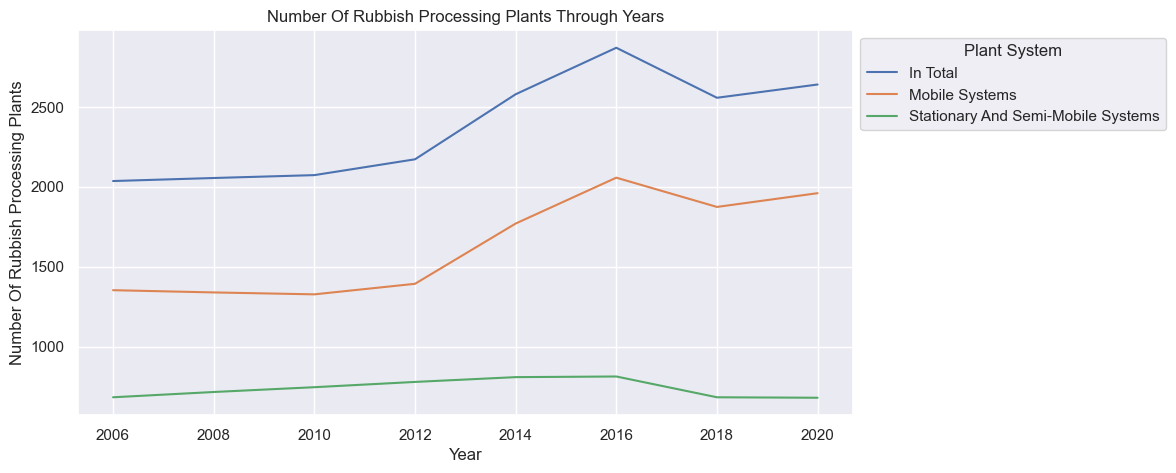

In [26]:
def plot_kpi_through_years(df, kpi):
    sns.set_theme()
    plt.figure(figsize=(10, 5))
    sns.lineplot(df, x='Year', y=kpi, hue='Plant System')
    plt.title(f"{kpi} Through Years")
    plt.legend(loc="upper left", title="Plant System", bbox_to_anchor=(1,1))

plot_kpi_through_years(df, 'Number Of Rubbish Processing Plants')

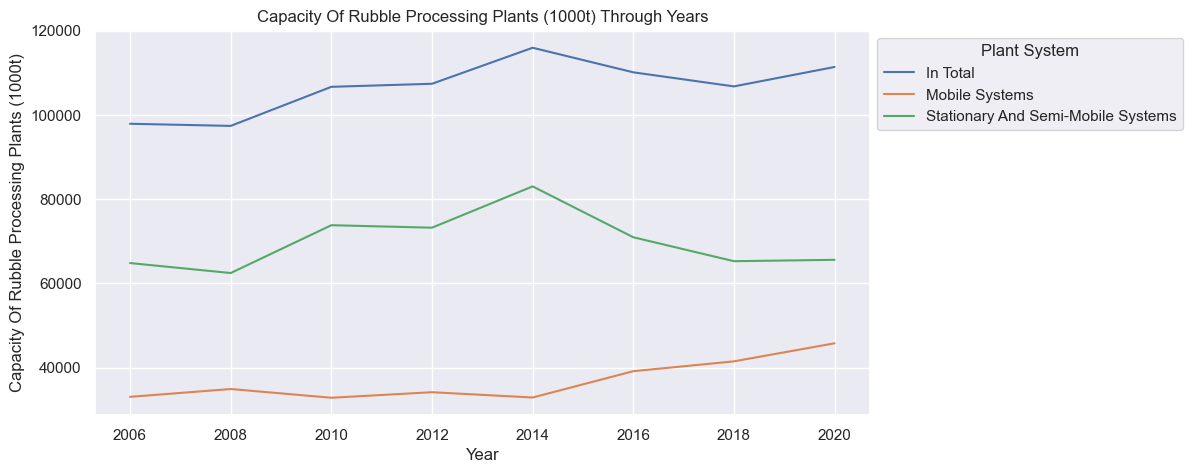

In [27]:
plot_kpi_through_years(df, "Capacity Of Rubble Processing Plants (1000t)")

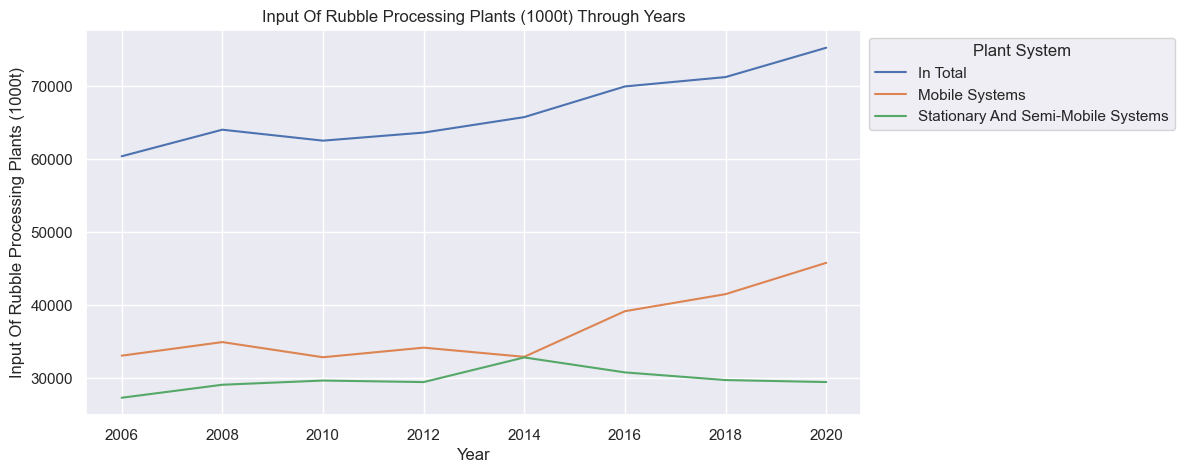

In [28]:
plot_kpi_through_years(df, "Input Of Rubble Processing Plants (1000t)")

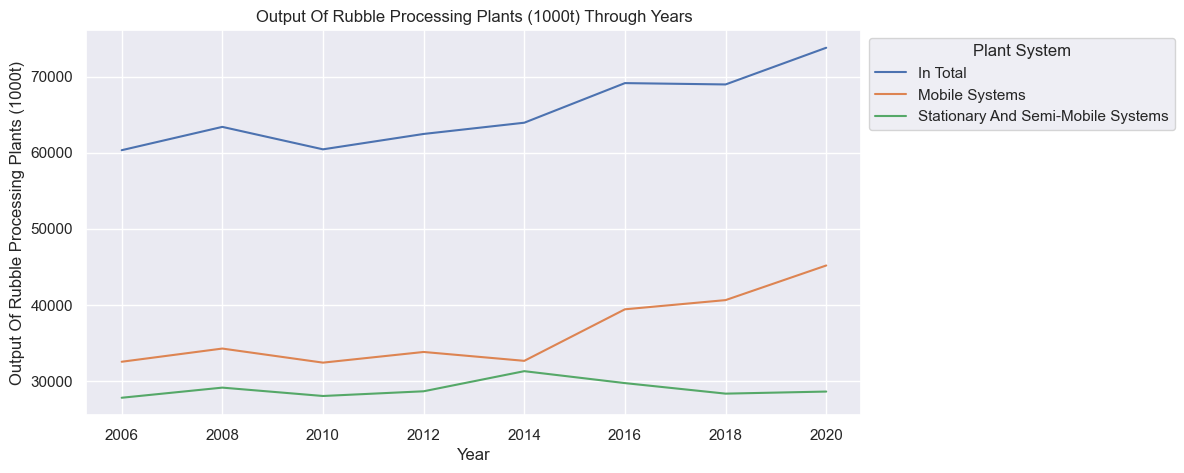

In [29]:
plot_kpi_through_years(df, "Output Of Rubble Processing Plants (1000t)")

In [30]:
df.columns

Index(['Year', 'Plant System', 'Number Of Rubbish Processing Plants',
       'Input Of Rubble Processing Plants (1000t)',
       'Capacity Of Rubble Processing Plants (1000t)',
       'Output Of Rubble Processing Plants (1000t)',
       'Number Of Asphalt Mixing Plants',
       'Input Of Asphalt Mixing Plants (1000t)'],
      dtype='object')

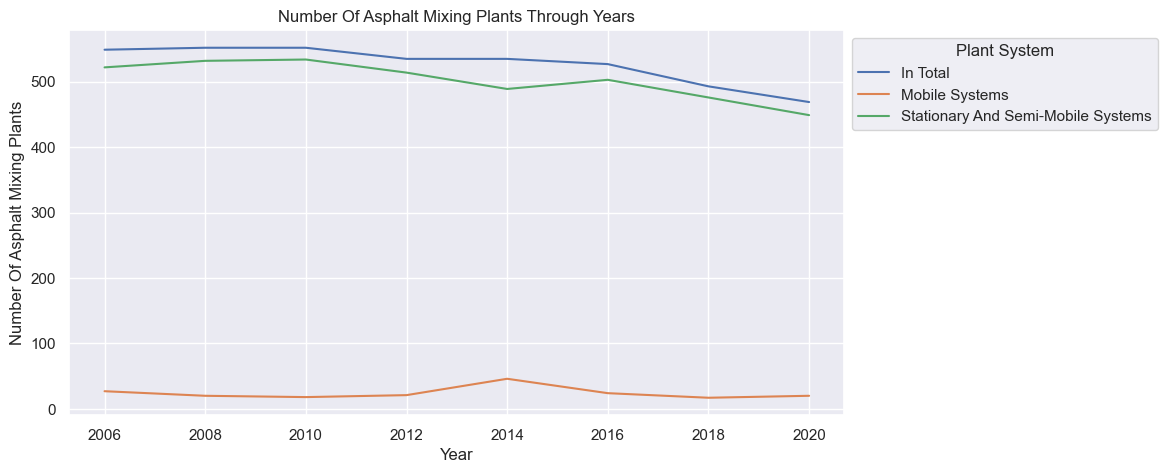

In [34]:
plot_kpi_through_years(df, "Number Of Asphalt Mixing Plants")
# plot_kpi_through_years(df, "Output Of Rubble Processing Plants (1000t)")

Number of asphalt mixing plants for stationary and semi-mobile systems far outweighed that for mobile systems

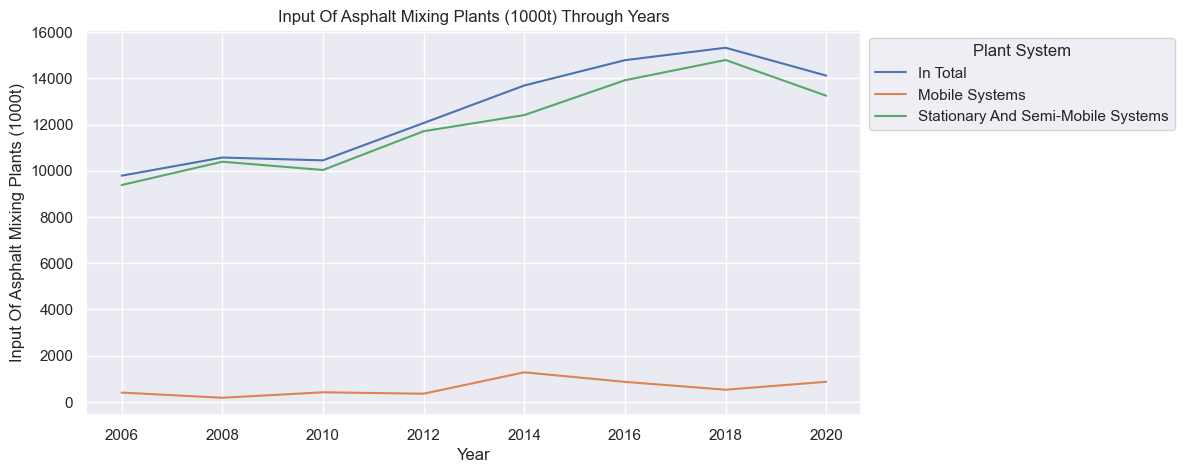

In [35]:
plot_kpi_through_years(df, "Input Of Asphalt Mixing Plants (1000t)")

Input for asphalt mixing plants for stationary and semi-mobile systems far outweighed that for mobile systems

## Average KPIs for each plant system

In [38]:
df.groupby('Plant System', as_index=False).agg(dict(zip(list(df.columns[2:]), ['mean']*6)))

,Plant System,Number Of Rubbish Processing Plants,Input Of Rubble Processing Plants (1000t),Capacity Of Rubble Processing Plants (1000t),Output Of Rubble Processing Plants (1000t),Number Of Asphalt Mixing Plants,Input Of Asphalt Mixing Plants (1000t)
0,In Total,2372.750,66597.1375,106715.6375,65304.7875,526.500,12597.5625
1,Mobile Systems,1634.125,36803.8000,36803.7125,36360.1625,24.125,613.5125
2,Stationary And Semi-Mobile Systems,738.625,29793.3250,69911.9375,28944.6125,502.375,11984.0625


## Calculate percentage increase in different KPIs of chosen plant system through years

In [41]:
def perc_inc_plant_kpi(df, plant_system, kpi):
    df1 = df.loc[df['Plant System'] == plant_system][['Year', kpi]]
    df1['last'] = df1[kpi].shift(1)
    df1['percInc'] = ((df1[kpi] - df1['last']) / df1['last']) * 100
    return df1[['Year', 'percInc']]

perc_inc_plant_kpi(df, 'Stationary And Semi-Mobile Systems', 'Input Of Rubble Processing Plants (1000t)')

,Year,percInc
0,2006,NaN
3,2008,6.522432
6,2010,1.974338
9,2012,-0.702447
12,2014,11.452411
15,2016,-6.235171
18,2018,-3.418448
21,2020,-0.913448


In [51]:
def perc_inc_plant(df, plant_system):
    df1 = df.loc[df['Plant System'] == plant_system][df.columns.drop('Plant System')]
    kpis = tuple(df.columns[2:])
    perckpis = []
    for kpi in kpis:
        lastname = 'last-'+kpi
        df1[lastname] = df1[kpi].shift(1)
        perckpi = '% Increase In '+kpi
        df1[perckpi] = ((df1[kpi] - df1[lastname]) / df1[lastname]) * 100
        perckpis.append(perckpi)

    return df1[['Year']+perckpis]

perc_inc_plant(df, 'Stationary And Semi-Mobile Systems')

,Year,% Increase In Number Of Rubbish Processing Plants,% Increase In Input Of Rubble Processing Plants (1000t),% Increase In Capacity Of Rubble Processing Plants (1000t),% Increase In Output Of Rubble Processing Plants (1000t),% Increase In Number Of Asphalt Mixing Plants,% Increase In Input Of Asphalt Mixing Plants (1000t)
0,2006,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,4.831625,6.522432,-3.646167,4.786882,1.915709,10.745651
6,2010,4.189944,1.974338,18.173073,-3.774110,0.375940,-3.440610
9,2012,4.423592,-0.702447,-0.799535,2.207428,-3.745318,16.707698
12,2014,3.851091,11.452411,13.390342,9.224765,-4.863813,5.956753
15,2016,0.494438,-6.235171,-14.548594,-5.013199,2.862986,12.153721
18,2018,-15.990160,-3.418448,-8.004650,-4.653980,-5.367793,6.297611
21,2020,-0.439239,-0.913448,0.500272,0.961267,-5.672269,-10.458316


In [52]:
perc_inc_plant(df, 'Mobile Systems')

,Year,% Increase In Number Of Rubbish Processing Plants,% Increase In Input Of Rubble Processing Plants (1000t),% Increase In Capacity Of Rubble Processing Plants (1000t),% Increase In Output Of Rubble Processing Plants (1000t),% Increase In Number Of Asphalt Mixing Plants,% Increase In Input Of Asphalt Mixing Plants (1000t)
1,2006,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,-1.034738,5.621531,5.621531,5.330616,-25.925926,-55.355380
7,2010,-0.896191,-5.940325,-5.940611,-5.401461,-10.000000,130.458817
10,2012,4.973625,3.997505,3.997517,4.326684,16.666667,-14.703766
13,2014,27.063891,-3.670616,-3.670627,-3.447807,119.047619,260.208099
16,2016,16.214689,18.981036,18.981093,20.743100,-47.826087,-32.235147
19,2018,-8.896451,5.962745,5.962505,3.065527,-29.166667,-39.009217
22,2020,4.589114,10.332332,10.332623,11.196631,17.647059,64.563657


In [53]:
perc_inc_plant(df, 'In Total')

,Year,% Increase In Number Of Rubbish Processing Plants,% Increase In Input Of Rubble Processing Plants (1000t),% Increase In Capacity Of Rubble Processing Plants (1000t),% Increase In Output Of Rubble Processing Plants (1000t),% Increase In Number Of Asphalt Mixing Plants,% Increase In Input Of Asphalt Mixing Plants (1000t)
2,2006,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,0.933202,6.029148,-0.515538,5.080068,0.546448,8.009114
8,2010,0.875912,-2.344243,9.524875,-4.653683,0.000000,-1.149317
11,2012,4.775687,1.767522,0.678035,3.343890,-3.079710,15.453589
14,2014,18.738490,3.330484,7.962362,2.364408,0.000000,13.451417
17,2016,11.283443,6.389852,-5.030491,8.138400,-1.495327,7.999825
20,2018,-10.905923,1.834057,-3.037325,-0.252676,-6.451613,3.637335
23,2020,3.245991,5.638487,4.321647,6.990782,-4.868154,-7.865931


## Calculate correlation between different KPIs for a plant system

In [54]:
def corr_kpi_plant(df, plant_system):
    df1 = df.loc[df['Plant System'] == plant_system][df.columns.drop(['Year', 'Plant System'])]
    return df1.corr()

corr_kpi_plant(df, "In Total")

,Number Of Rubbish Processing Plants,Input Of Rubble Processing Plants (1000t),Capacity Of Rubble Processing Plants (1000t),Output Of Rubble Processing Plants (1000t),Number Of Asphalt Mixing Plants,Input Of Asphalt Mixing Plants (1000t)
Number Of Rubbish Processing Plants,1.000000,0.815759,0.735864,0.810952,-0.648754,0.928814
Input Of Rubble Processing Plants (1000t),0.815759,1.000000,0.537596,0.989247,-0.929218,0.853370
Capacity Of Rubble Processing Plants (1000t),0.735864,0.537596,1.000000,0.467400,-0.461965,0.708568
Output Of Rubble Processing Plants (1000t),0.810952,0.989247,0.467400,1.000000,-0.913539,0.819597
Number Of Asphalt Mixing Plants,-0.648754,-0.929218,-0.461965,-0.913539,1.000000,-0.750840
Input Of Asphalt Mixing Plants (1000t),0.928814,0.853370,0.708568,0.819597,-0.750840,1.000000


In [55]:
corr_kpi_plant(df, "Mobile Systems")

,Number Of Rubbish Processing Plants,Input Of Rubble Processing Plants (1000t),Capacity Of Rubble Processing Plants (1000t),Output Of Rubble Processing Plants (1000t),Number Of Asphalt Mixing Plants,Input Of Asphalt Mixing Plants (1000t)
Number Of Rubbish Processing Plants,1.000000,0.756577,0.756574,0.786655,0.141886,0.722249
Input Of Rubble Processing Plants (1000t),0.756577,1.000000,1.000000,0.997576,-0.397682,0.242191
Capacity Of Rubble Processing Plants (1000t),0.756574,1.000000,1.000000,0.997576,-0.397683,0.242188
Output Of Rubble Processing Plants (1000t),0.786655,0.997576,0.997576,1.000000,-0.376547,0.276253
Number Of Asphalt Mixing Plants,0.141886,-0.397682,-0.397683,-0.376547,1.000000,0.725248
Input Of Asphalt Mixing Plants (1000t),0.722249,0.242191,0.242188,0.276253,0.725248,1.000000


In [56]:
corr_kpi_plant(df, "Stationary And Semi-Mobile Systems")

,Number Of Rubbish Processing Plants,Input Of Rubble Processing Plants (1000t),Capacity Of Rubble Processing Plants (1000t),Output Of Rubble Processing Plants (1000t),Number Of Asphalt Mixing Plants,Input Of Asphalt Mixing Plants (1000t)
Number Of Rubbish Processing Plants,1.000000,0.728268,0.794468,0.713171,0.226100,0.128133
Input Of Rubble Processing Plants (1000t),0.728268,1.000000,0.794160,0.891675,-0.302958,0.493604
Capacity Of Rubble Processing Plants (1000t),0.794468,0.794160,1.000000,0.670239,0.013835,0.061307
Output Of Rubble Processing Plants (1000t),0.713171,0.891675,0.670239,1.000000,-0.199931,0.321306
Number Of Asphalt Mixing Plants,0.226100,-0.302958,0.013835,-0.199931,1.000000,-0.766010
Input Of Asphalt Mixing Plants (1000t),0.128133,0.493604,0.061307,0.321306,-0.766010,1.000000
